# ***Level 2 Project 3 - Fraud Detection***

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load your dataset
df = pd.read_csv('/content/L2 P3 Fraud Detection.csv')
# Step 3: Basic info
print(df.shape)
print(df.info())
print(df.describe())

(55551, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55551 entries, 0 to 55550
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    55551 non-null  int64  
 1   V1      55551 non-null  float64
 2   V2      55551 non-null  float64
 3   V3      55551 non-null  float64
 4   V4      55551 non-null  float64
 5   V5      55551 non-null  float64
 6   V6      55551 non-null  float64
 7   V7      55551 non-null  float64
 8   V8      55551 non-null  float64
 9   V9      55551 non-null  float64
 10  V10     55551 non-null  float64
 11  V11     55551 non-null  float64
 12  V12     55551 non-null  float64
 13  V13     55551 non-null  float64
 14  V14     55551 non-null  float64
 15  V15     55550 non-null  float64
 16  V16     55550 non-null  float64
 17  V17     55550 non-null  float64
 18  V18     55550 non-null  float64
 19  V19     55550 non-null  float64
 20  V20     55550 non-null  float64
 21  V21     55550 non-null 

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop rows where 'Class' is missing (if any)
if missing_values['Class'] > 0:
    df = df.dropna(subset=['Class'])

# Fill missing values (recommended for continuous data)
df = df.fillna(df.mean(numeric_only=True))  # Fill numeric columns with their mean

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


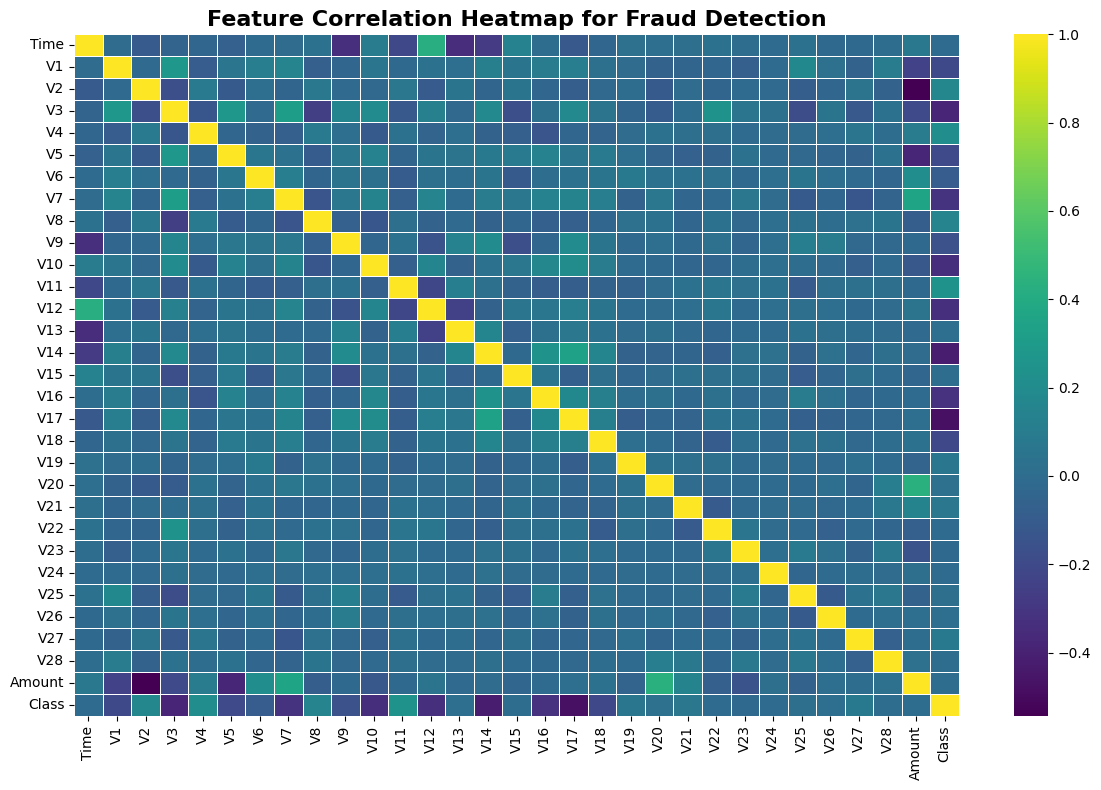

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=False, linewidths=0.5, linecolor='white')
plt.title("Feature Correlation Heatmap for Fraud Detection", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
#Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Build Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("-----------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("-----------------------------------------")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9981098109810981
-----------------------------------------
Confusion Matrix:
 [[11068    11]
 [   10    21]]
-----------------------------------------
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11079
         1.0       0.66      0.68      0.67        31

    accuracy                           1.00     11110
   macro avg       0.83      0.84      0.83     11110
weighted avg       1.00      1.00      1.00     11110

